In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [3]:
import yfinance as yf

start = '2010-01-01'
end = '2024-11-01'

df = yf.download('AAPL', start=start, end=end)
df.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
2010-01-07,6.328810,6.371488,6.282827,6.363974,477131200
2010-01-08,6.370885,6.371486,6.283127,6.320394,447610800


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-10-25,230.599411,232.403068,228.765860,228.935263,38802300
2024-10-28,232.582443,233.907786,231.735430,232.502737,36087100
2024-10-29,232.851501,233.509193,231.506239,232.283506,35417200
2024-10-30,229.293991,232.652181,228.745915,231.795193,47070900
2024-10-31,225.118683,229.024950,224.580566,228.536661,64370100


In [7]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431895,6.446621,6.382907,6.414463,493729600
1,2010-01-05,6.443017,6.479383,6.409055,6.449629,601904800
2,2010-01-06,6.340532,6.468563,6.333920,6.443017,552160000
3,2010-01-07,6.328810,6.371488,6.282827,6.363974,477131200
4,2010-01-08,6.370885,6.371486,6.283127,6.320394,447610800


In [9]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\singh\AppData\Local\Temp\ipykernel_19136\3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443017,6.479383,6.409055,6.449629,601904800
2,6.340532,6.468563,6.333920,6.443017,552160000
3,6.328810,6.371488,6.282827,6.363974,477131200
4,6.370885,6.371486,6.283127,6.320394,447610800


In [11]:
print(df.columns) 

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [13]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443017,6.479383,6.409055,6.449629,601904800
2,6.340532,6.468563,6.333920,6.443017,552160000
3,6.328810,6.371488,6.282827,6.363974,477131200
4,6.370885,6.371486,6.283127,6.320394,447610800


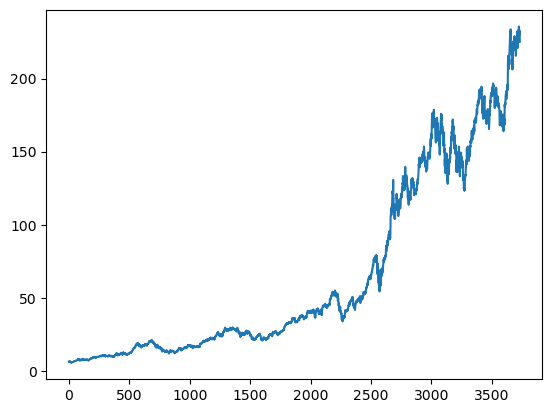

In [15]:
plt.plot(df.Close)

In [17]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431895,6.446621,6.382907,6.414463,493729600
1,6.443017,6.479383,6.409055,6.449629,601904800
2,6.340532,6.468563,6.333920,6.443017,552160000
3,6.328810,6.371488,6.282827,6.363974,477131200
4,6.370885,6.371486,6.283127,6.320394,447610800
...,...,...,...,...,...
3728,230.599411,232.403068,228.765860,228.935263,38802300
3729,232.582443,233.907786,231.735430,232.502737,36087100
3730,232.851501,233.509193,231.506239,232.283506,35417200


In [19]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3728,221.019867
3729,221.396109
3730,221.788877
3731,222.122082


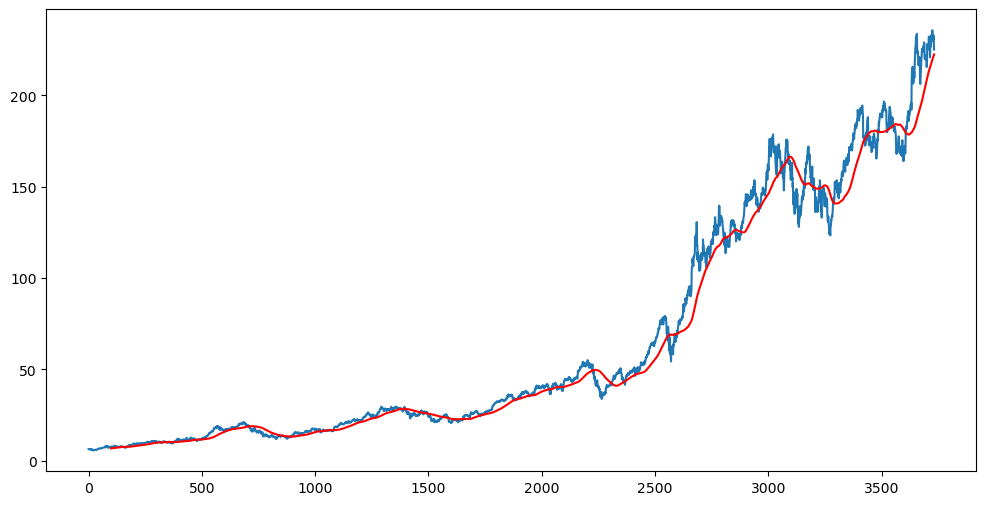

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [23]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3728,200.065639
3729,200.307348
3730,200.548763
3731,200.783758


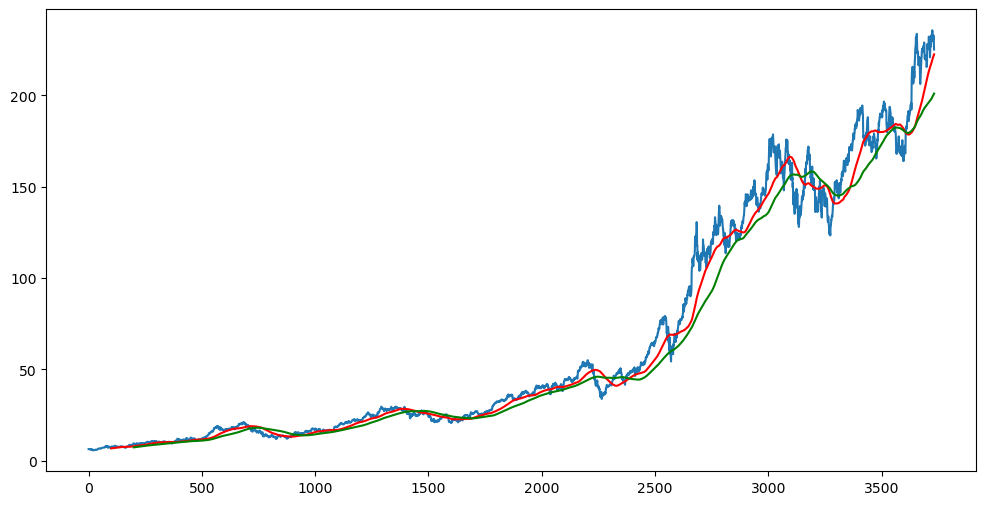

In [25]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [27]:
df.shape

(3733, 5)

In [29]:
#splitting data into testing and training

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing  = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2613, 1)
(1120, 1)


In [31]:
data_training.head()

Ticker,AAPL
0,6.431895
1,6.443017
2,6.340532
3,6.328810
4,6.370885


In [33]:
data_testing.head()

Ticker,AAPL
2613,77.000023
2614,77.495789
2615,76.970871
2616,77.306213
2617,77.340233


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [37]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00897591],
       [0.00912717],
       [0.00773336],
       ...,
       [0.96246567],
       [0.95645044],
       [0.97657817]])

In [39]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
    


In [41]:
!pip install absl-py



In [42]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential





In [47]:


model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Users\singh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - loss: 0.0431
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0051
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0050
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0054
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - loss: 0.0036
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0040
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - loss: 0.0037
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - loss: 0.0037
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 145ms/step - loss: 0.0026
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0027
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - loss: 0.0027
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0026
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 146ms/step - loss: 0.0023
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0023
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [55]:
model.save('keras_model.h5')

In [59]:
data_testing.head()

Ticker,AAPL
2613,77.000023
2614,77.495789
2615,76.970871
2616,77.306213
2617,77.340233


In [65]:
past_100_days = data_training.tail(100)




In [70]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [72]:
final_df.head()

Ticker,AAPL
0,70.069977
1,70.485855
2,71.000854
3,72.620850
4,71.914825


In [82]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.08656219],
       [0.0888564 ],
       [0.09169742],
       ...,
       [0.98455283],
       [0.96492769],
       [0.94189444]])

In [84]:
input_data.shape

(1220, 1)

In [90]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [94]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1120, 100, 1)
(1120,)


In [96]:
#Making Predictions

y_predicted = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


In [98]:
y_predicted.shape

(1120, 1)

In [102]:
y_test

array([0.12479206, 0.12752697, 0.12463124, ..., 0.98455283, 0.96492769,
       0.94189444])

In [106]:
y_predicted

array([[0.16019666],
       [0.16270624],
       [0.16488087],
       ...,
       [0.9402168 ],
       [0.9396137 ],
       [0.9381354 ]], dtype=float32)

In [108]:
scaler.scale_

array([0.00551654])

In [110]:
scale_factor = 1/0.00551654
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor



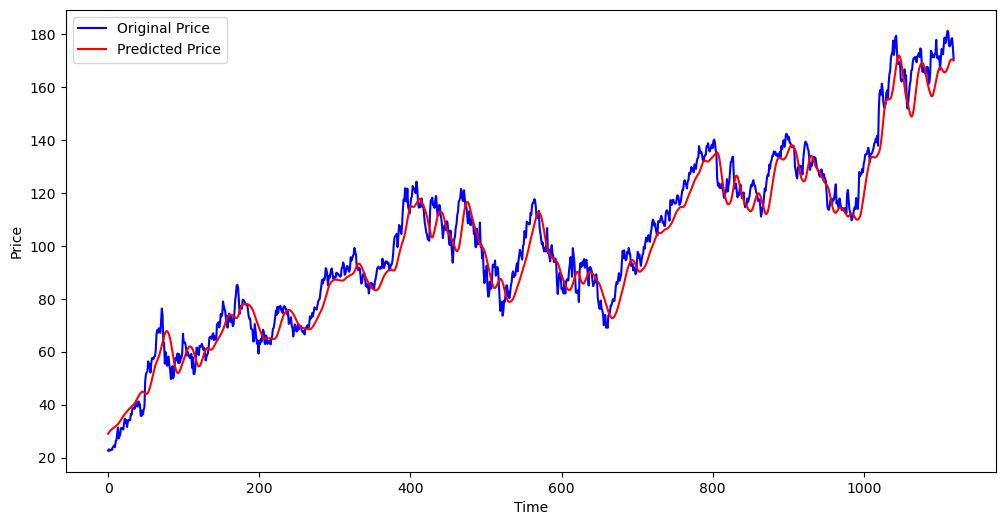

In [114]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()